In [2]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import OpenSSL.crypto as ssl
import matplotlib, OpenSSL, ssl, subprocess, pickle, collections, datetime, hashlib, os, re, time, sys
from matplotlib.pyplot import MultipleLocator
from brokenaxes import brokenaxes

In [3]:
RESULT_PATH="./week_scan_result/"
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="#e87722"

In [4]:
def findAllFile(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            fullname = os.path.join(root, f)
            yield fullname

In [ ]:
./week_scan_result/2022-07-08/doh3/zmap_doh3_443.txt
./week_scan_result/2022-07-08/doh3/doh3_location/doh3_location.txt
./week_scan_result/2022-07-08/doh3/doh3_443_scan/result_doh3.txt
./week_scan_result/2022-07-08/doh3/doh3_443_result/result_doh3_verify.txt
./week_scan_result/2022-07-08/doh3/doh3_443_result/result_doh3_verify_ip.txt
./week_scan_result/2022-07-08/doh3/doh3_443_result/result_doh3_verify_ip_uniq.txt
./week_scan_result/2022-07-08/doh/result_doh_ip_uniq.txt
./week_scan_result/2022-07-08/doh/result_doh.txt
./week_scan_result/2022-07-08/dot/have_dot.txt
./week_scan_result/2022-07-08/doq/zmap_doq_853.txt
./week_scan_result/2022-07-08/doq/doq_853_scan/result_doq.txt
./week_scan_result/2022-07-08/doq/doq_853_result/result_success.txt
./week_scan_result/2022-07-08/doq/doq_853_result/result_fail.txt
./week_scan_result/2022-07-08/doq/doq_853_result/result_scan.txt
./week_scan_result/2022-07-08/doq/doq_853_location/doq_853_location.txt
./week_scan_result/2022-09-02/doh3/zmap_doh3_443.txt
./week_scan_result/2022-09-02/doh3/doh3_location/doh3_location_new.txt
./week_scan_result/2022-09-02/doh3/doh3_location/doh3_location.txt
./week_scan_result/2022-09-02/doh3/doh3_443_scan/result_doh3.txt
./week_scan_result/2022-09-02/doh3/doh3_443_result/result_doh3_verify.txt
./week_scan_result/2022-09-02/doh3/doh3_443_result/result_doh3_verify_ip.txt
./week_scan_result/2022-09-02/doh3/doh3_443_result/result_doh3_verify_ip_uniq.txt
./week_scan_result/2022-09-02/doh/result_doh_ip_uniq.txt
./week_scan_result/2022-09-02/doh/result_revoke.txt
./week_scan_result/2022-09-02/doh/result_cert.txt
./week_scan_result/2022-09-02/doh/result_doh.txt
./week_scan_result/2022-09-02/doh/result_ct.txt
./week_scan_result/2022-09-02/doh/result_tls.txt
./week_scan_result/2022-09-02/dot/result_revoke.txt
./week_scan_result/2022-09-02/dot/result_cert.txt
./week_scan_result/2022-09-02/dot/result_ct.txt
./week_scan_result/2022-09-02/dot/have_dot.txt
./week_scan_result/2022-09-02/dot/result_tls.txt
./week_scan_result/2022-09-02/doq/zmap_doq_853.txt
./week_scan_result/2022-09-02/doq/doq_853_scan/result_doq.txt
./week_scan_result/2022-09-02/doq/doq_853_result/result_success.txt
./week_scan_result/2022-09-02/doq/doq_853_result/result_fail.txt
./week_scan_result/2022-09-02/doq/doq_853_result/result_scan.txt
./week_scan_result/2022-09-02/doq/doq_853_location/doq_853_location_new.txt
./week_scan_result/2022-09-02/doq/doq_853_location/doq_853_location.txt
./week_scan_result/2022-08-05/doh3/zmap_doh3_443.txt
./week_scan_result/2022-08-05/doh3/doh3_location/doh3_location.txt
./week_scan_result/2022-08-05/doh3/doh3_443_scan/result_doh3.txt
./week_scan_result/2022-08-05/doh3/doh3_443_result/result_doh3_verify.txt
./week_scan_result/2022-08-05/doh3/doh3_443_result/result_doh3_verify_ip.txt
./week_scan_result/2022-08-05/doh3/doh3_443_result/result_doh3_verify_ip_uniq.txt
./week_scan_result/2022-08-05/doh/result_doh_ip_uniq.txt
./week_scan_result/2022-08-05/doh/result_doh.txt
./week_scan_result/2022-08-05/dot/have_dot.txt
./week_scan_result/2022-08-05/doq/zmap_doq_853.txt
./week_scan_result/2022-08-05/doq/doq_853_scan/result_doq.txt
./week_scan_result/2022-08-05/doq/doq_853_result/result_success.txt
./week_scan_result/2022-08-05/doq/doq_853_result/result_fail.txt
./week_scan_result/2022-08-05/doq/doq_853_result/result_scan.txt
./week_scan_result/2022-08-05/doq/doq_853_location/doq_853_location.txt

# DoX服务器数量变化

In [5]:


dot_num_dict = {}
doh_num_dict = {}
doq_num_dict = {}
doh3_num_dict = {}

for name in findAllFile(RESULT_PATH):
    if ".DS_Store" in name:
        continue
    time_name = name.split("/")[2]
    dns_type = name.split("/")[3]
    file_name = name.split("/")[-1]

    if dns_type == "doh3":
        if file_name == "result_doh3_verify.txt":
            
            raw_data = pd.read_csv(name,names=['ip','suffix','flag','get','post'])
            raw_data.drop_duplicates(subset=['ip'], keep='first', inplace=True)

            raw_len = len(raw_data) + 1
            doh3_num_dict[time_name] = raw_len
    
    if dns_type == "doq":
        if file_name == "result_success.txt":
            
            raw_data = pd.read_csv(name)
            raw_len = len(raw_data) + 1
            doq_num_dict[time_name] = raw_len
    
    if dns_type == "doh":
        if file_name == "result_doh.txt":
            
            raw_data = pd.read_csv(name,names=['ip'])
            raw_data.drop_duplicates(subset=['ip'], keep='first', inplace=True)

            raw_len = len(raw_data) + 1
            doh_num_dict[time_name] = raw_len
            
    if dns_type == "dot":
        if file_name == "have_dot.txt":
            
            raw_data = pd.read_csv(name)
            raw_len = len(raw_data) + 1
            dot_num_dict[time_name] = raw_len


dot_num_dict = dict(sorted(dot_num_dict.items(),key=lambda x:x[0]))
doh_num_dict = dict(sorted(doh_num_dict.items(),key=lambda x:x[0]))
doq_num_dict = dict(sorted(doq_num_dict.items(),key=lambda x:x[0]))
doh3_num_dict = dict(sorted(doh3_num_dict.items(),key=lambda x:x[0]))

print(dict(dot_num_dict))

print(doh_num_dict)
print(doq_num_dict)
print(doh3_num_dict)

{'2022-07-08': 21029, '2022-08-05': 21073, '2022-09-02': 21223}
{'2022-07-08': 3, '2022-08-05': 3, '2022-09-02': 3}
{'2022-07-08': 1578, '2022-08-05': 1732, '2022-09-02': 1717, '2022-09-27': 1926, '2022-10-26': 1926, '2022-11-27': 2617}
{'2022-07-08': 70, '2022-08-05': 189, '2022-09-02': 141, '2022-09-27': 181, '2022-10-26': 80}


In [6]:
time_list = ['2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12']
dot_num_list = [21029, 21073, 21223, 22474, 22927,22716]
doh_num_list = [10651, 10663, 11186, 11372, 11316,11502]
doq_num_list = [1978, 2332, 2817, 3226, 3026,3436]
doh3_num_list = [159, 288, 375, 510, 496, 580] #264.78

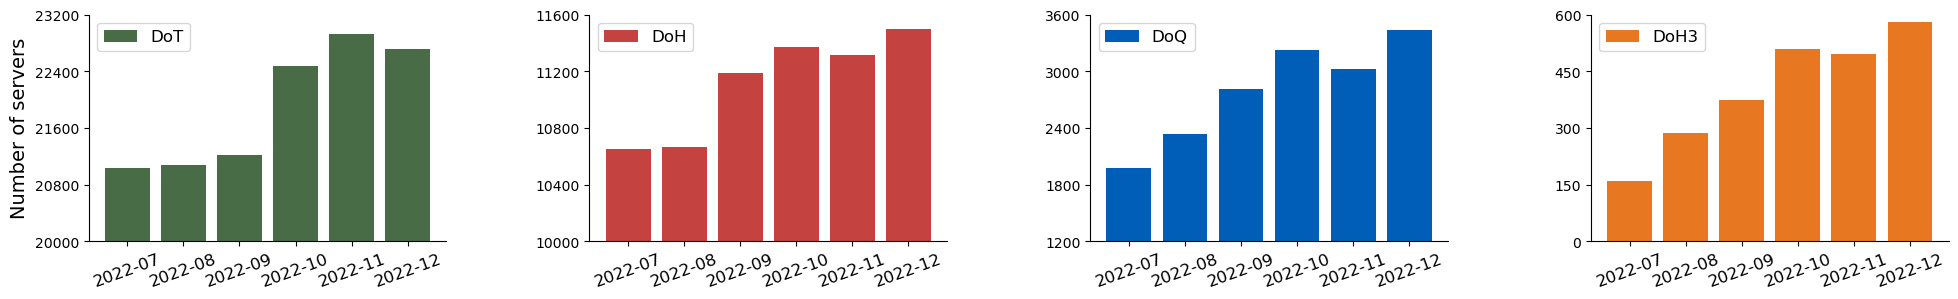

In [7]:
colors = ["#af24b9", '#84584e', '#486c46','#c44240', TUMBlue, TUMOrange] 
font2 = {'family' : 'Times New Roman',
# 'weight' : 'normal',
'size'   : 20,
}
    
fig, axs = plt.subplots(figsize=(24,3), ncols=4, nrows=1, sharex=False, sharey=False,dpi=100)
axs[0].bar(time_list,dot_num_list,color=colors[2],label="DoT")
axs[0].set_ylim(20000,23200)
axs[0].set_yticks(np.arange(20000,23201,800))
axs[0].set_ylabel("Number of servers",fontsize=14)

axs[1].bar(time_list,doh_num_list,color=colors[3],label="DoH")
axs[1].set_ylim(10000,11600)
axs[1].set_yticks(np.arange(10000,11601,400),fontsize=12)

axs[2].bar(time_list,doq_num_list,color=colors[4],label="DoQ")
axs[2].set_ylim(1200,3600)
axs[2].set_yticks(np.arange(1200,3601,600),fontsize=12)

axs[3].bar(time_list,doh3_num_list,color=colors[5],label="DoH3")
axs[3].set_ylim(0,600)
axs[3].set_yticks(np.arange(0,601,150),fontsize=12)

for ax in axs:
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.legend(loc=2,fontsize=12)
    scale_ls = np.arange(0,6,1)
#     index_ls = ['2022-0','0.01','0.02','0.03','0.04']
    ax.set_xticks(scale_ls, time_list,rotation=20,fontsize=12)

plt.savefig("./fig/dox_number_bar.pdf")
plt.subplots_adjust(wspace=0.4)

plt.show()

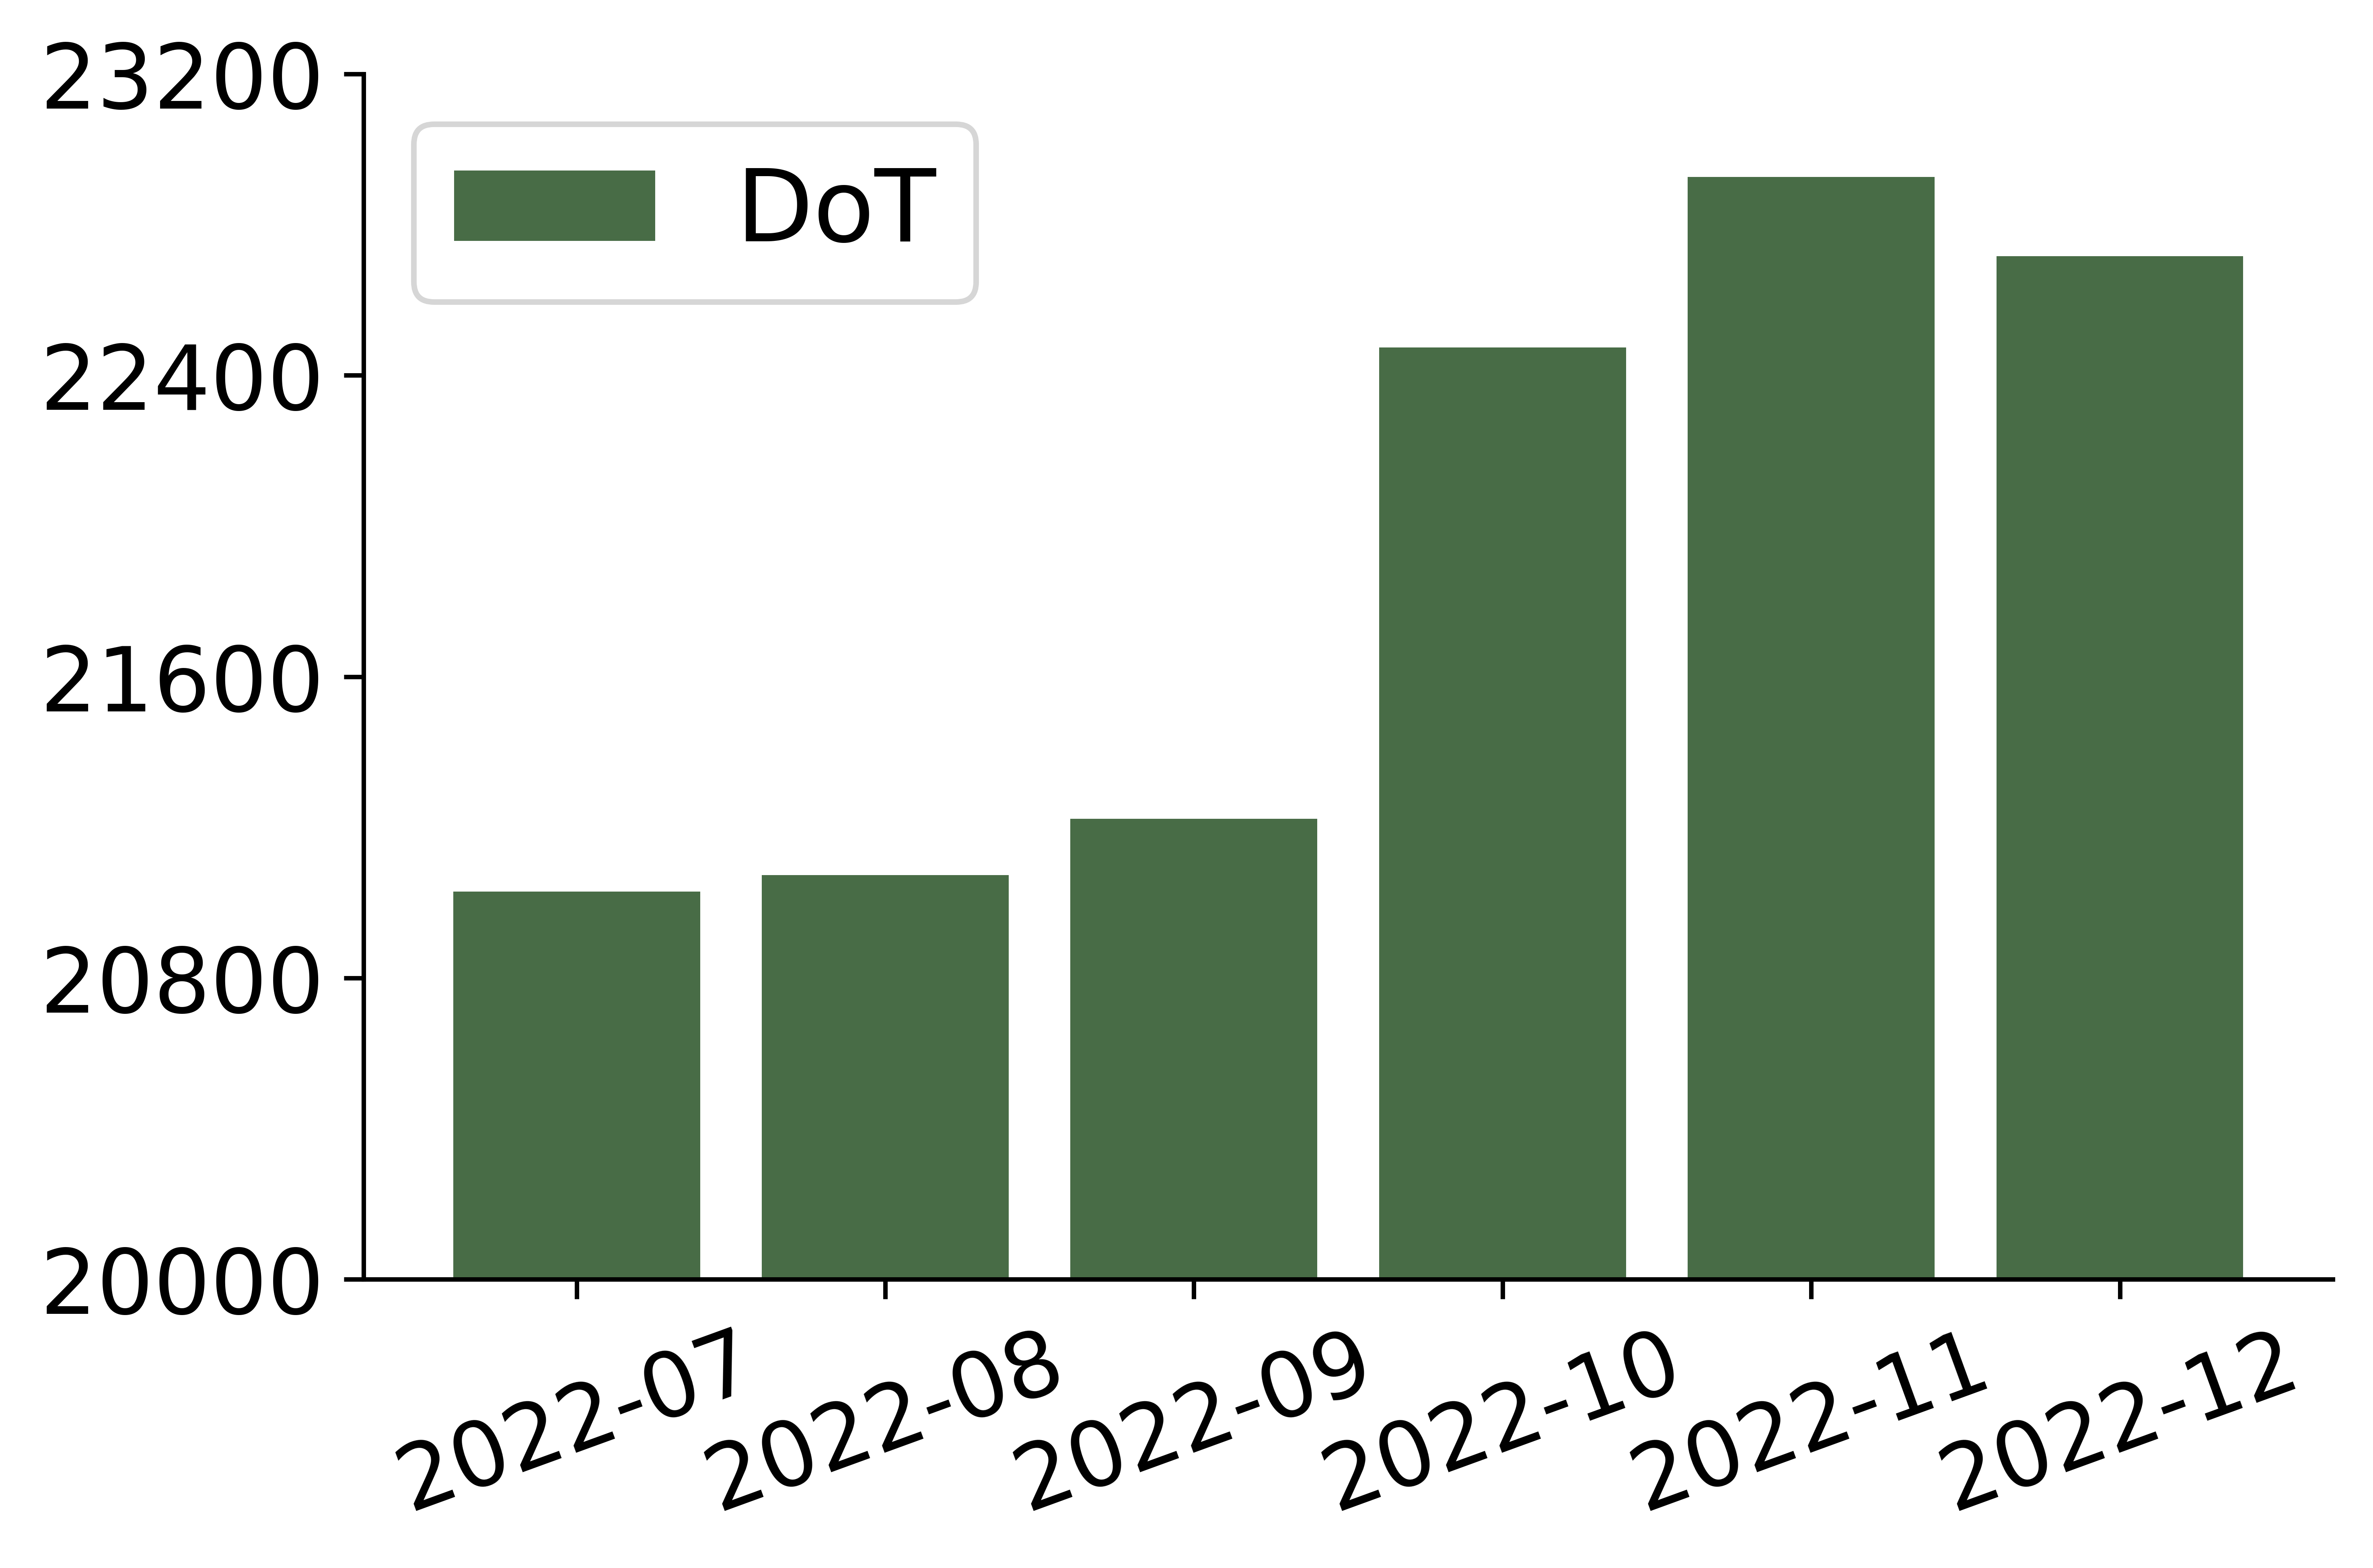

In [8]:
fig, ax = plt.subplots(dpi=1000)

plt.bar(time_list,dot_num_list,color=colors[2],label="DoT")
plt.ylim(20000,23200)
plt.yticks(np.arange(20000,23201,800),fontsize=16)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend(loc=2,fontsize=18)
scale_ls = np.arange(0,6,1)
plt.xticks(scale_ls, time_list,rotation=20,fontsize=16)
# plt.ylabel("Number of servers",fontsize=14)
plt.tight_layout()
plt.savefig("./fig/dot_number_bar.pdf")
plt.show()

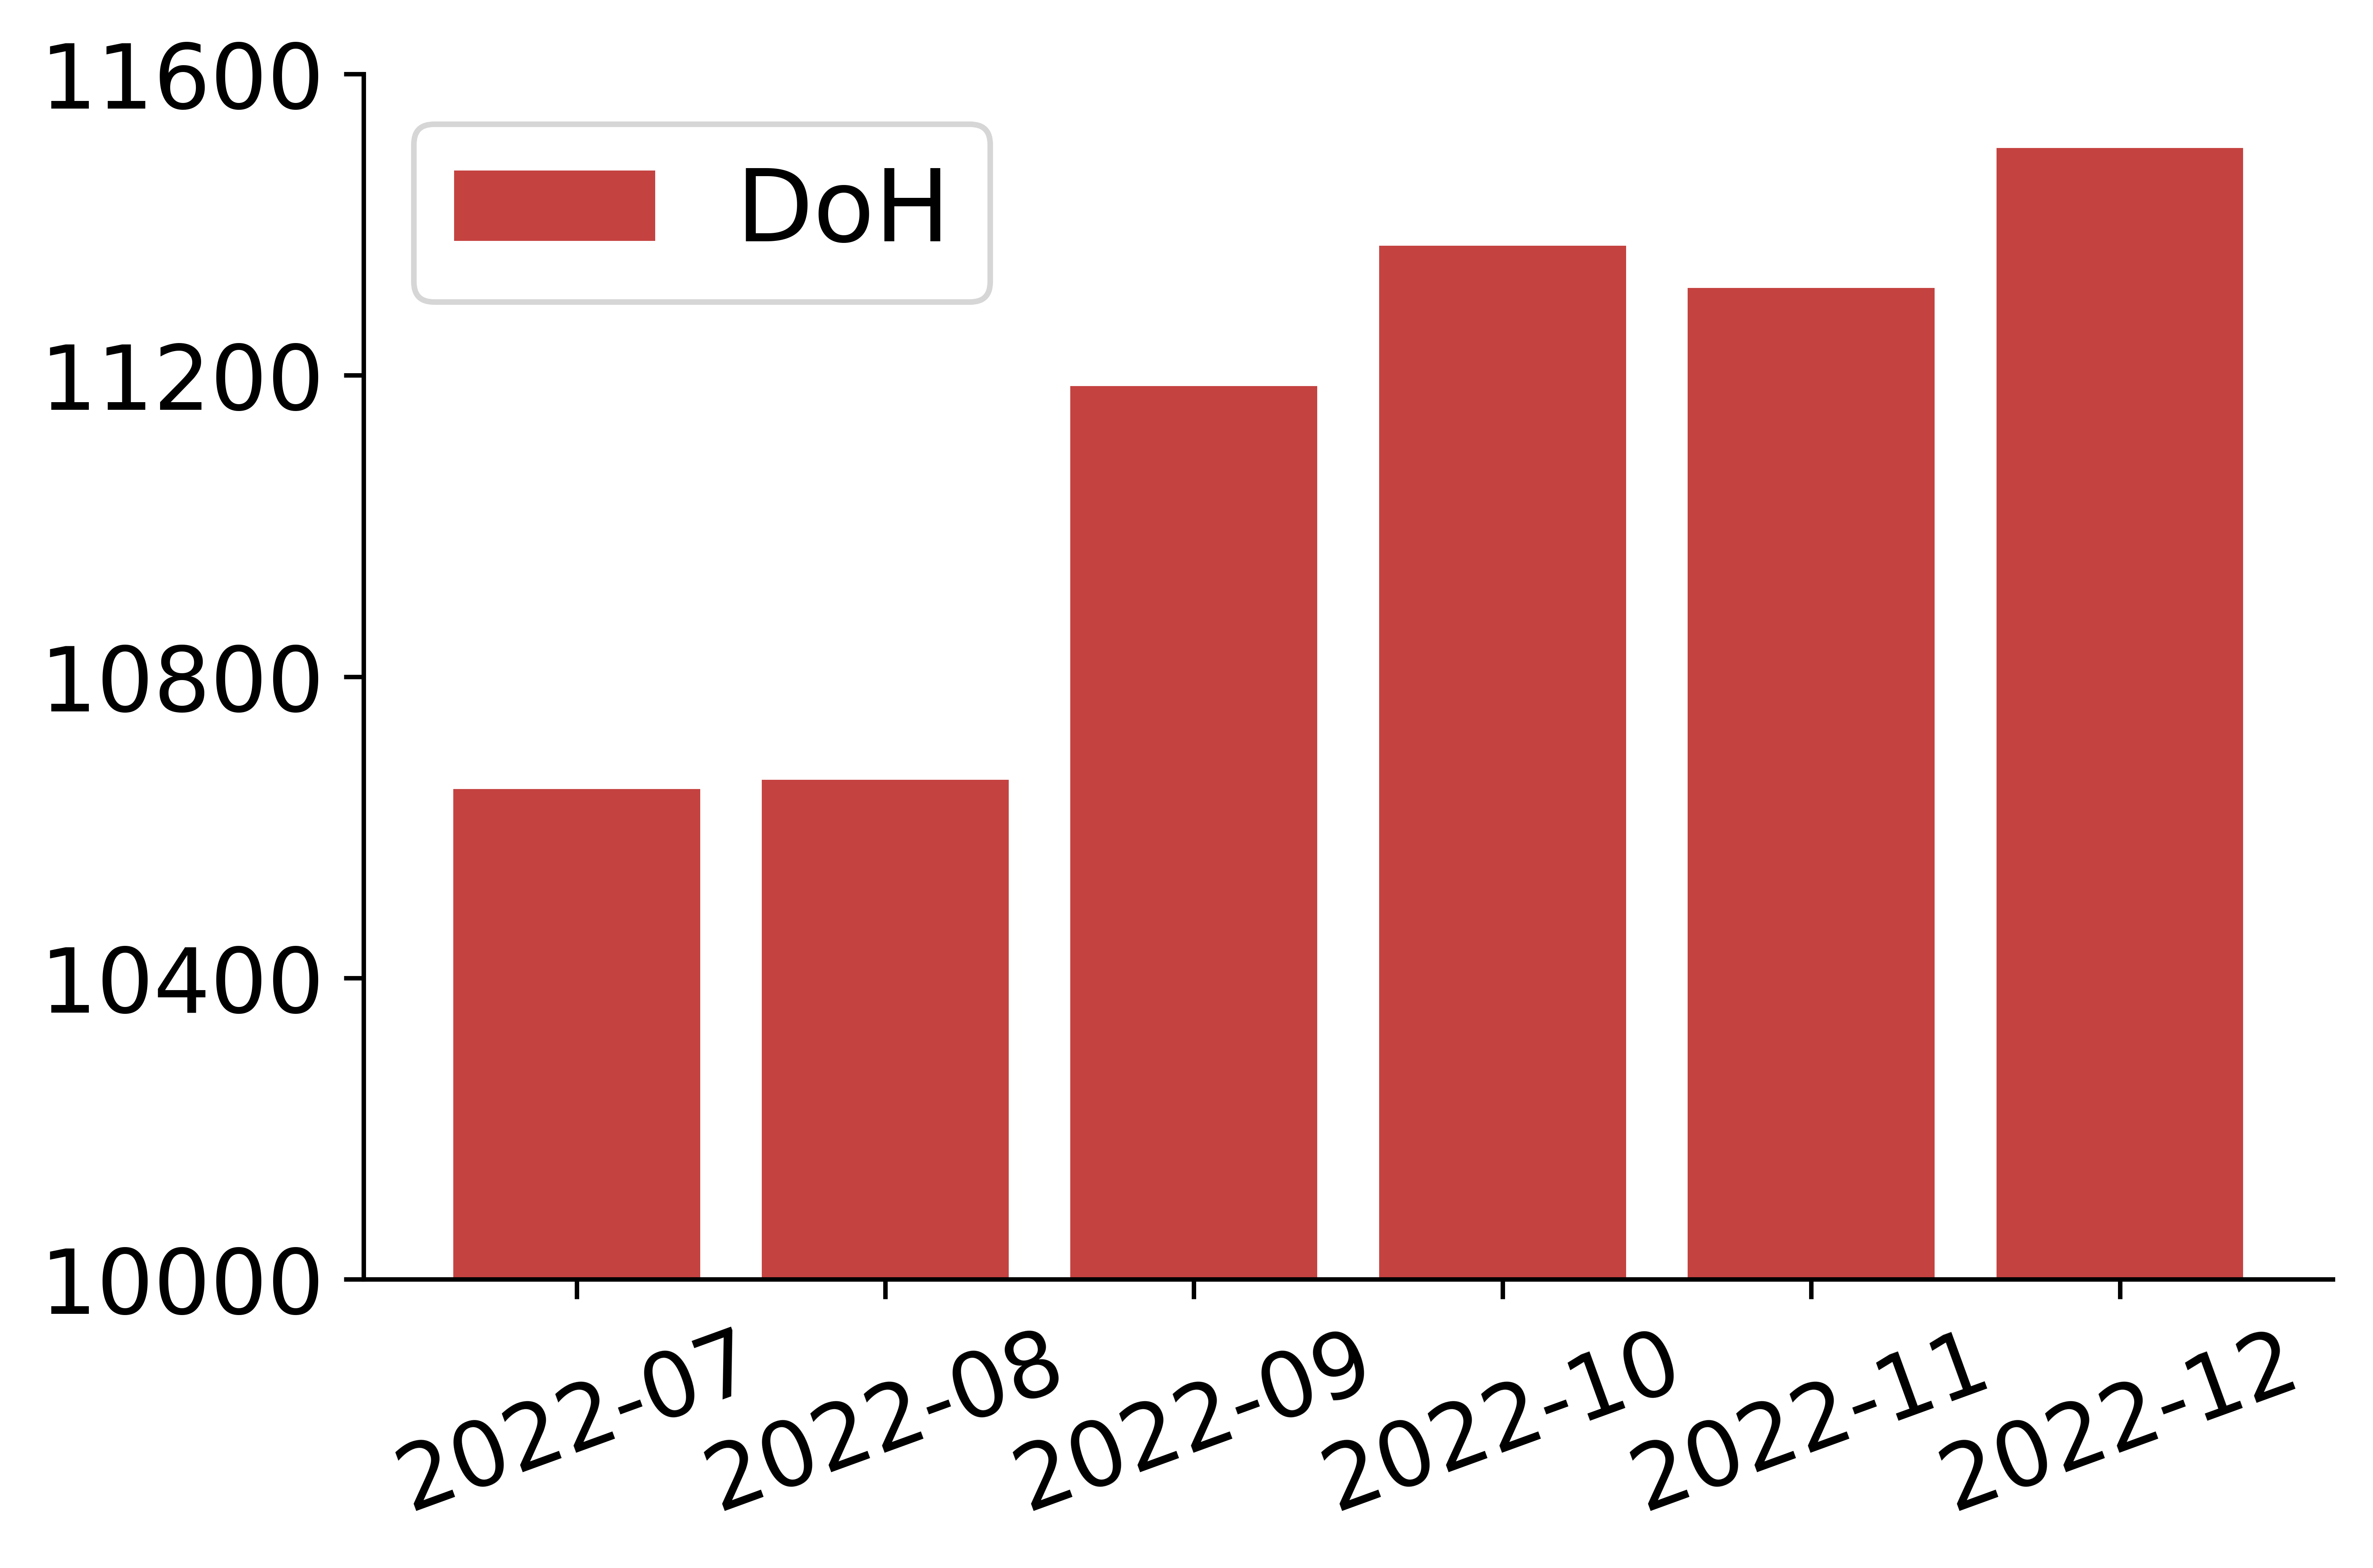

In [9]:
fig, ax = plt.subplots(dpi=1000)

plt.bar(time_list,doh_num_list,color=colors[3],label="DoH")
plt.ylim(10000,11600)
plt.yticks(np.arange(10000,11601,400),fontsize=16)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend(loc=2,fontsize=18)
scale_ls = np.arange(0,6,1)
plt.xticks(scale_ls, time_list,rotation=20,fontsize=16)
# plt.ylabel("Number of servers",fontsize=14)
plt.tight_layout()
plt.savefig("./fig/doh_number_bar.pdf")

plt.show()

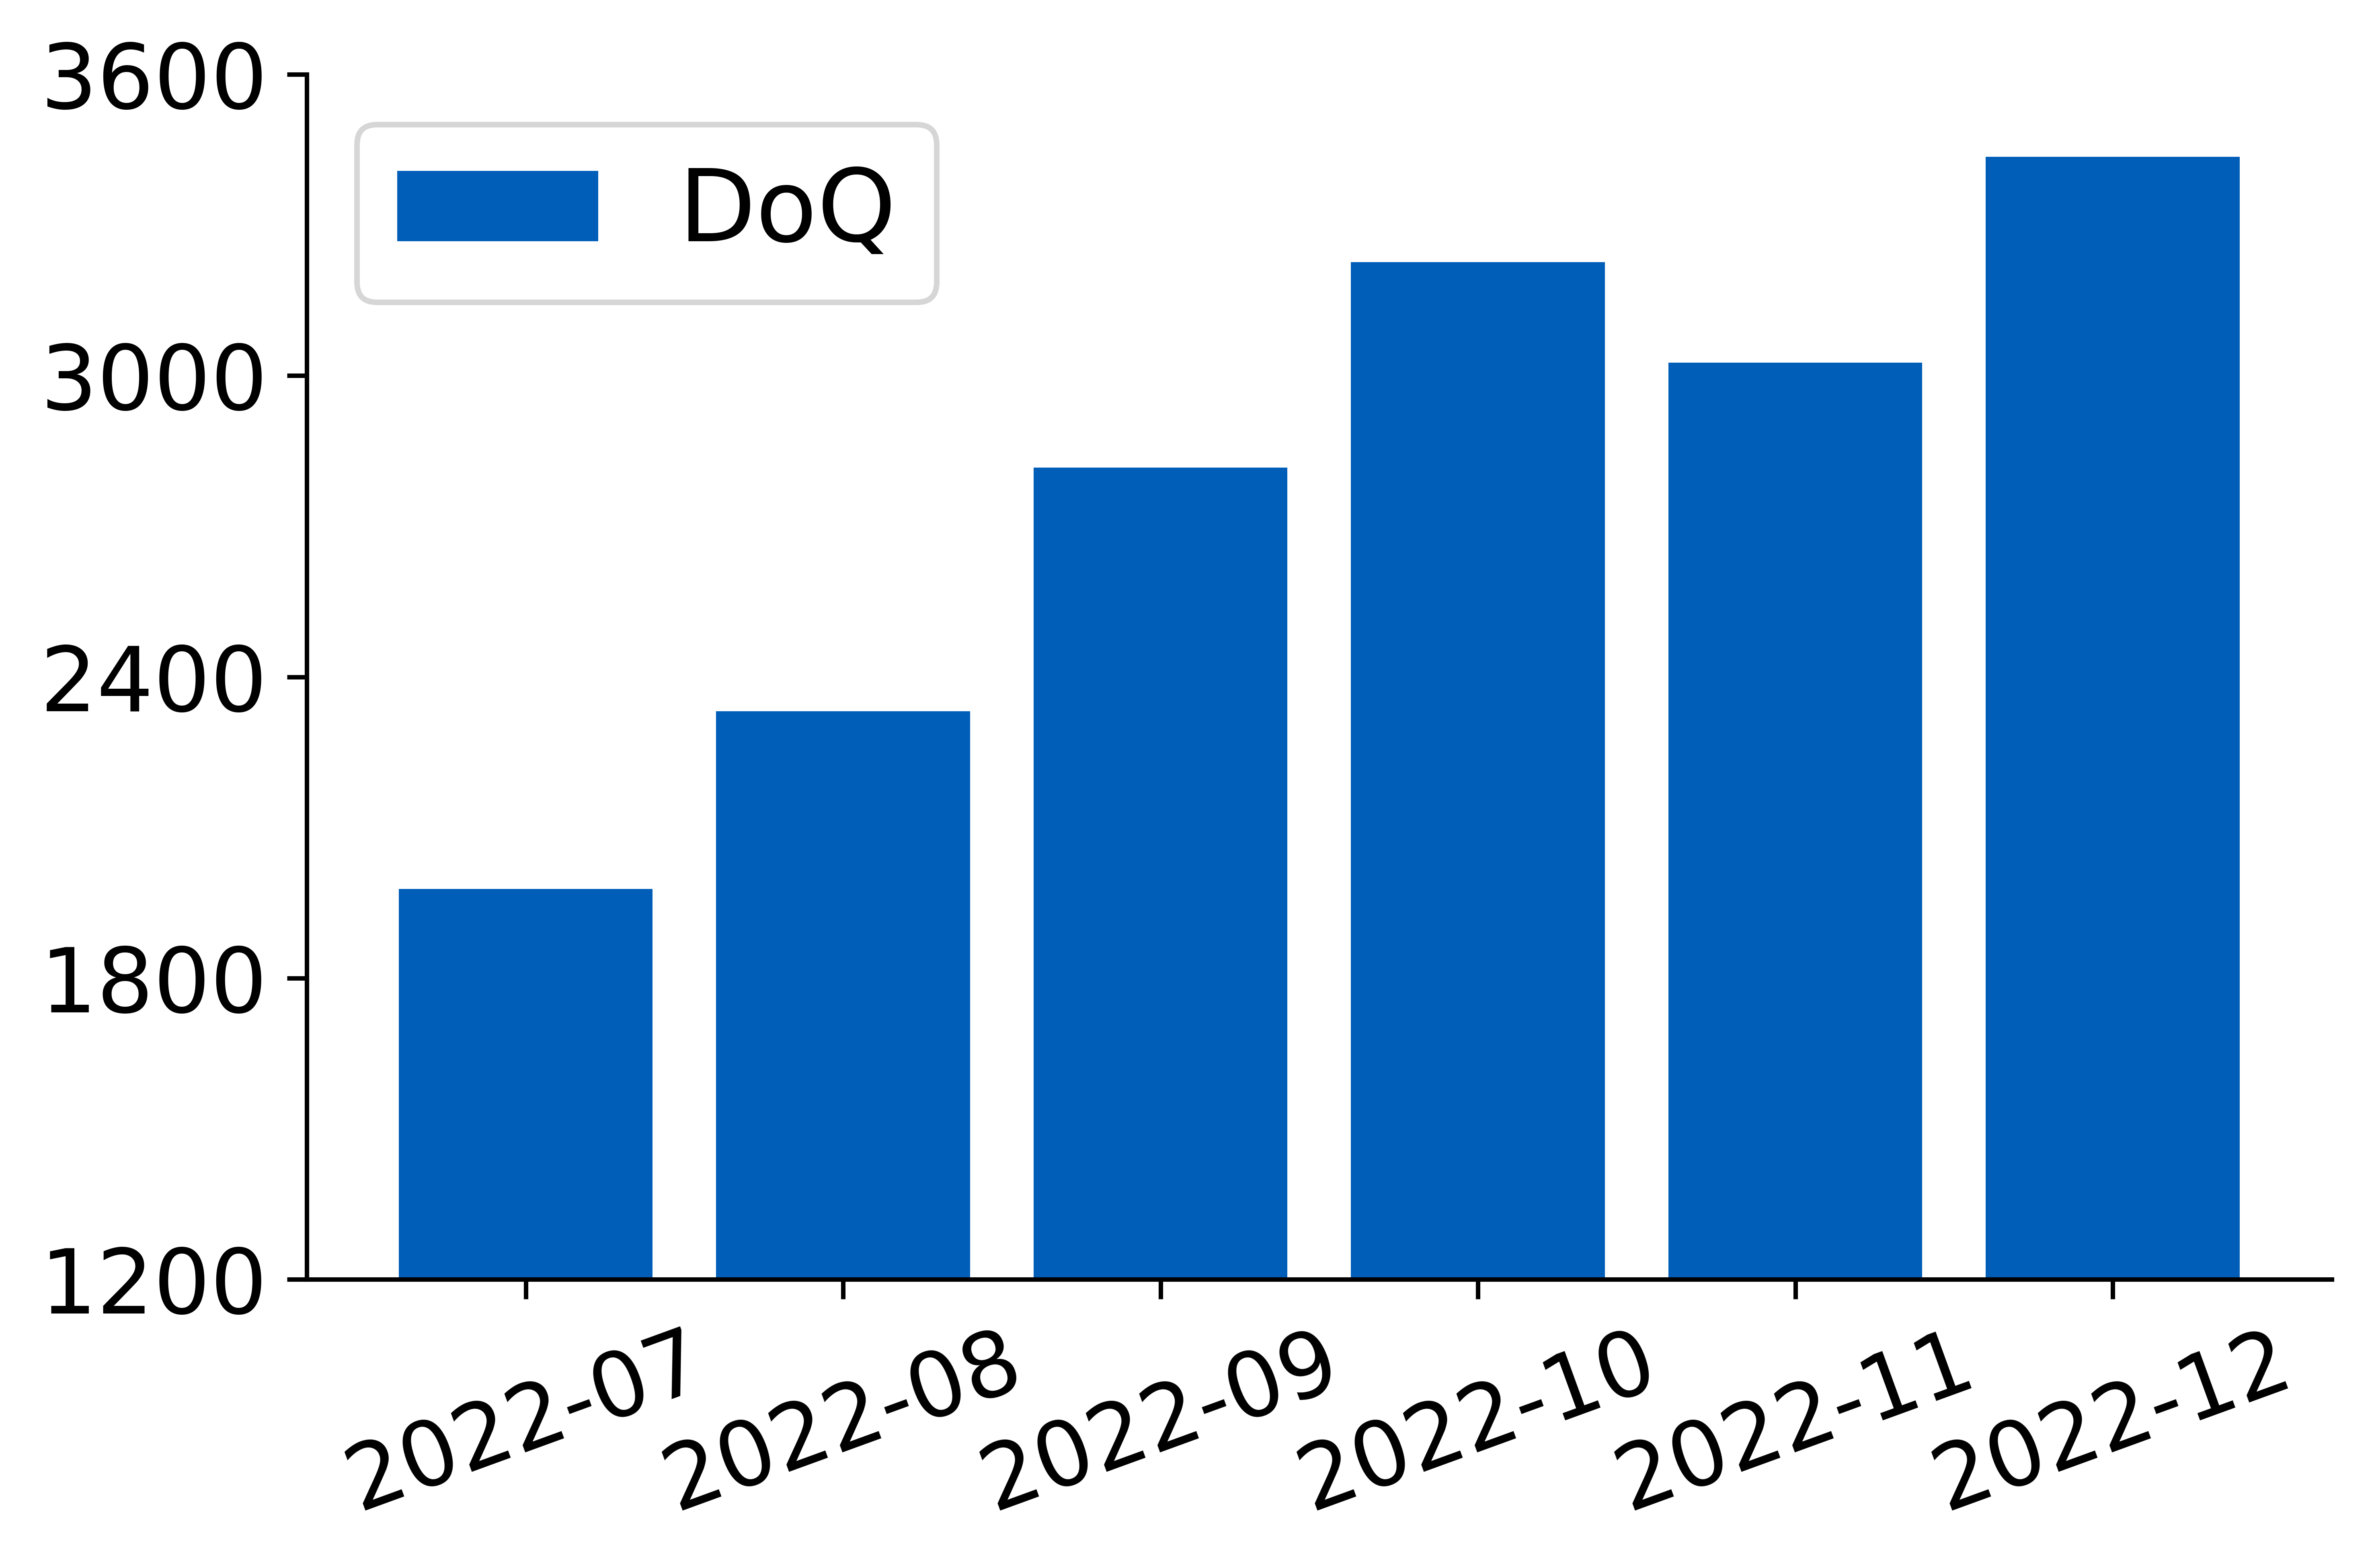

In [10]:
fig, ax = plt.subplots(dpi=1000)

plt.bar(time_list,doq_num_list,color=colors[4],label="DoQ")
plt.ylim(1200,3600)
plt.yticks(np.arange(1200,3601,600),fontsize=16)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend(loc=2,fontsize=18)
scale_ls = np.arange(0,6,1)
plt.xticks(scale_ls, time_list,rotation=20,fontsize=16)
# plt.ylabel("Number of servers",fontsize=14)
plt.tight_layout()
plt.savefig("./fig/doq_number_bar.pdf")
plt.show()

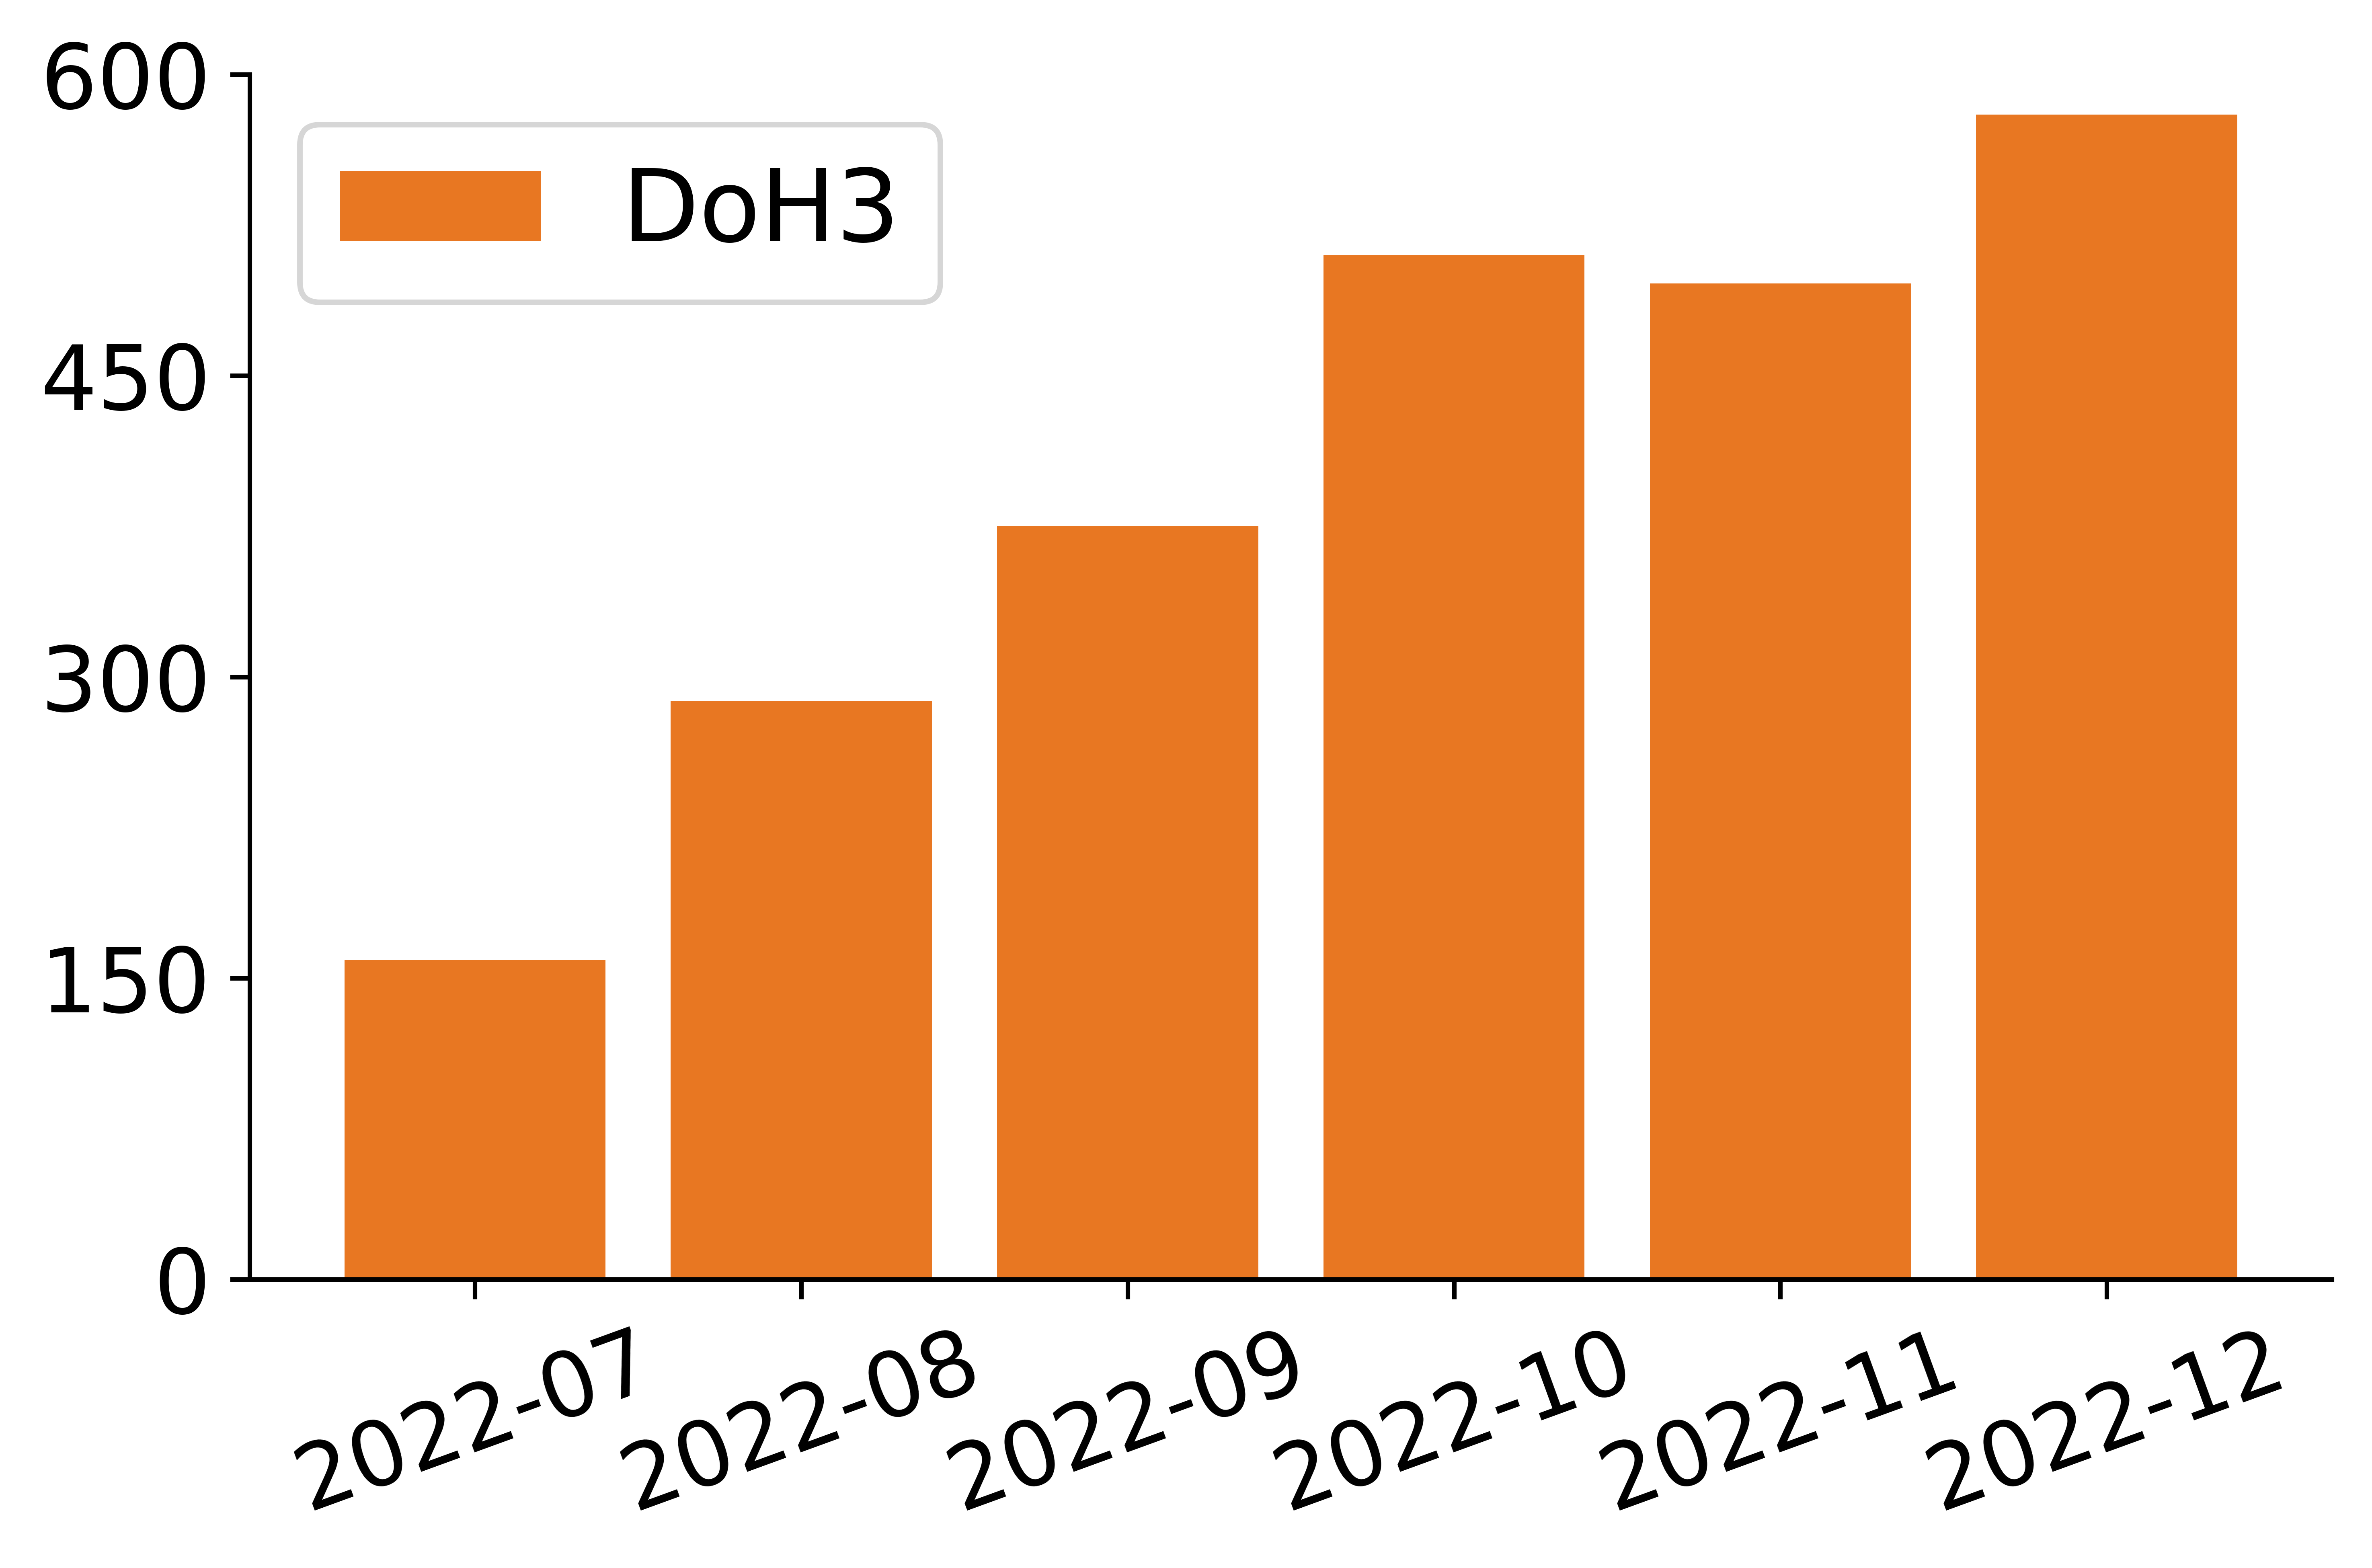

In [11]:
fig, ax = plt.subplots(dpi=1000)

plt.bar(time_list,doh3_num_list,color=colors[5],label="DoH3")
plt.ylim(0,600)
plt.yticks(np.arange(0,601,150),fontsize=16)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend(loc=2,fontsize=18)
scale_ls = np.arange(0,6,1)
plt.xticks(scale_ls, time_list,rotation=20,fontsize=16)
# plt.ylabel("Number of servers",fontsize=14)
plt.tight_layout()
plt.savefig("./fig/doh3_number_bar.pdf")
plt.show()

# 证书生命周期 

In [13]:
dot_raw = pd.read_json("./hk_data/dot/result/result_scan.txt",lines=True)
doh_raw = pd.read_json("./hk_data/doh/result/result_scan.txt",lines=True)
doq_raw = pd.read_json("./hk_data/doq/result/result_scan.txt",lines=True)
doh3_raw = pd.read_json("./hk_data/doh3/result/result_doh3.txt",lines=True)

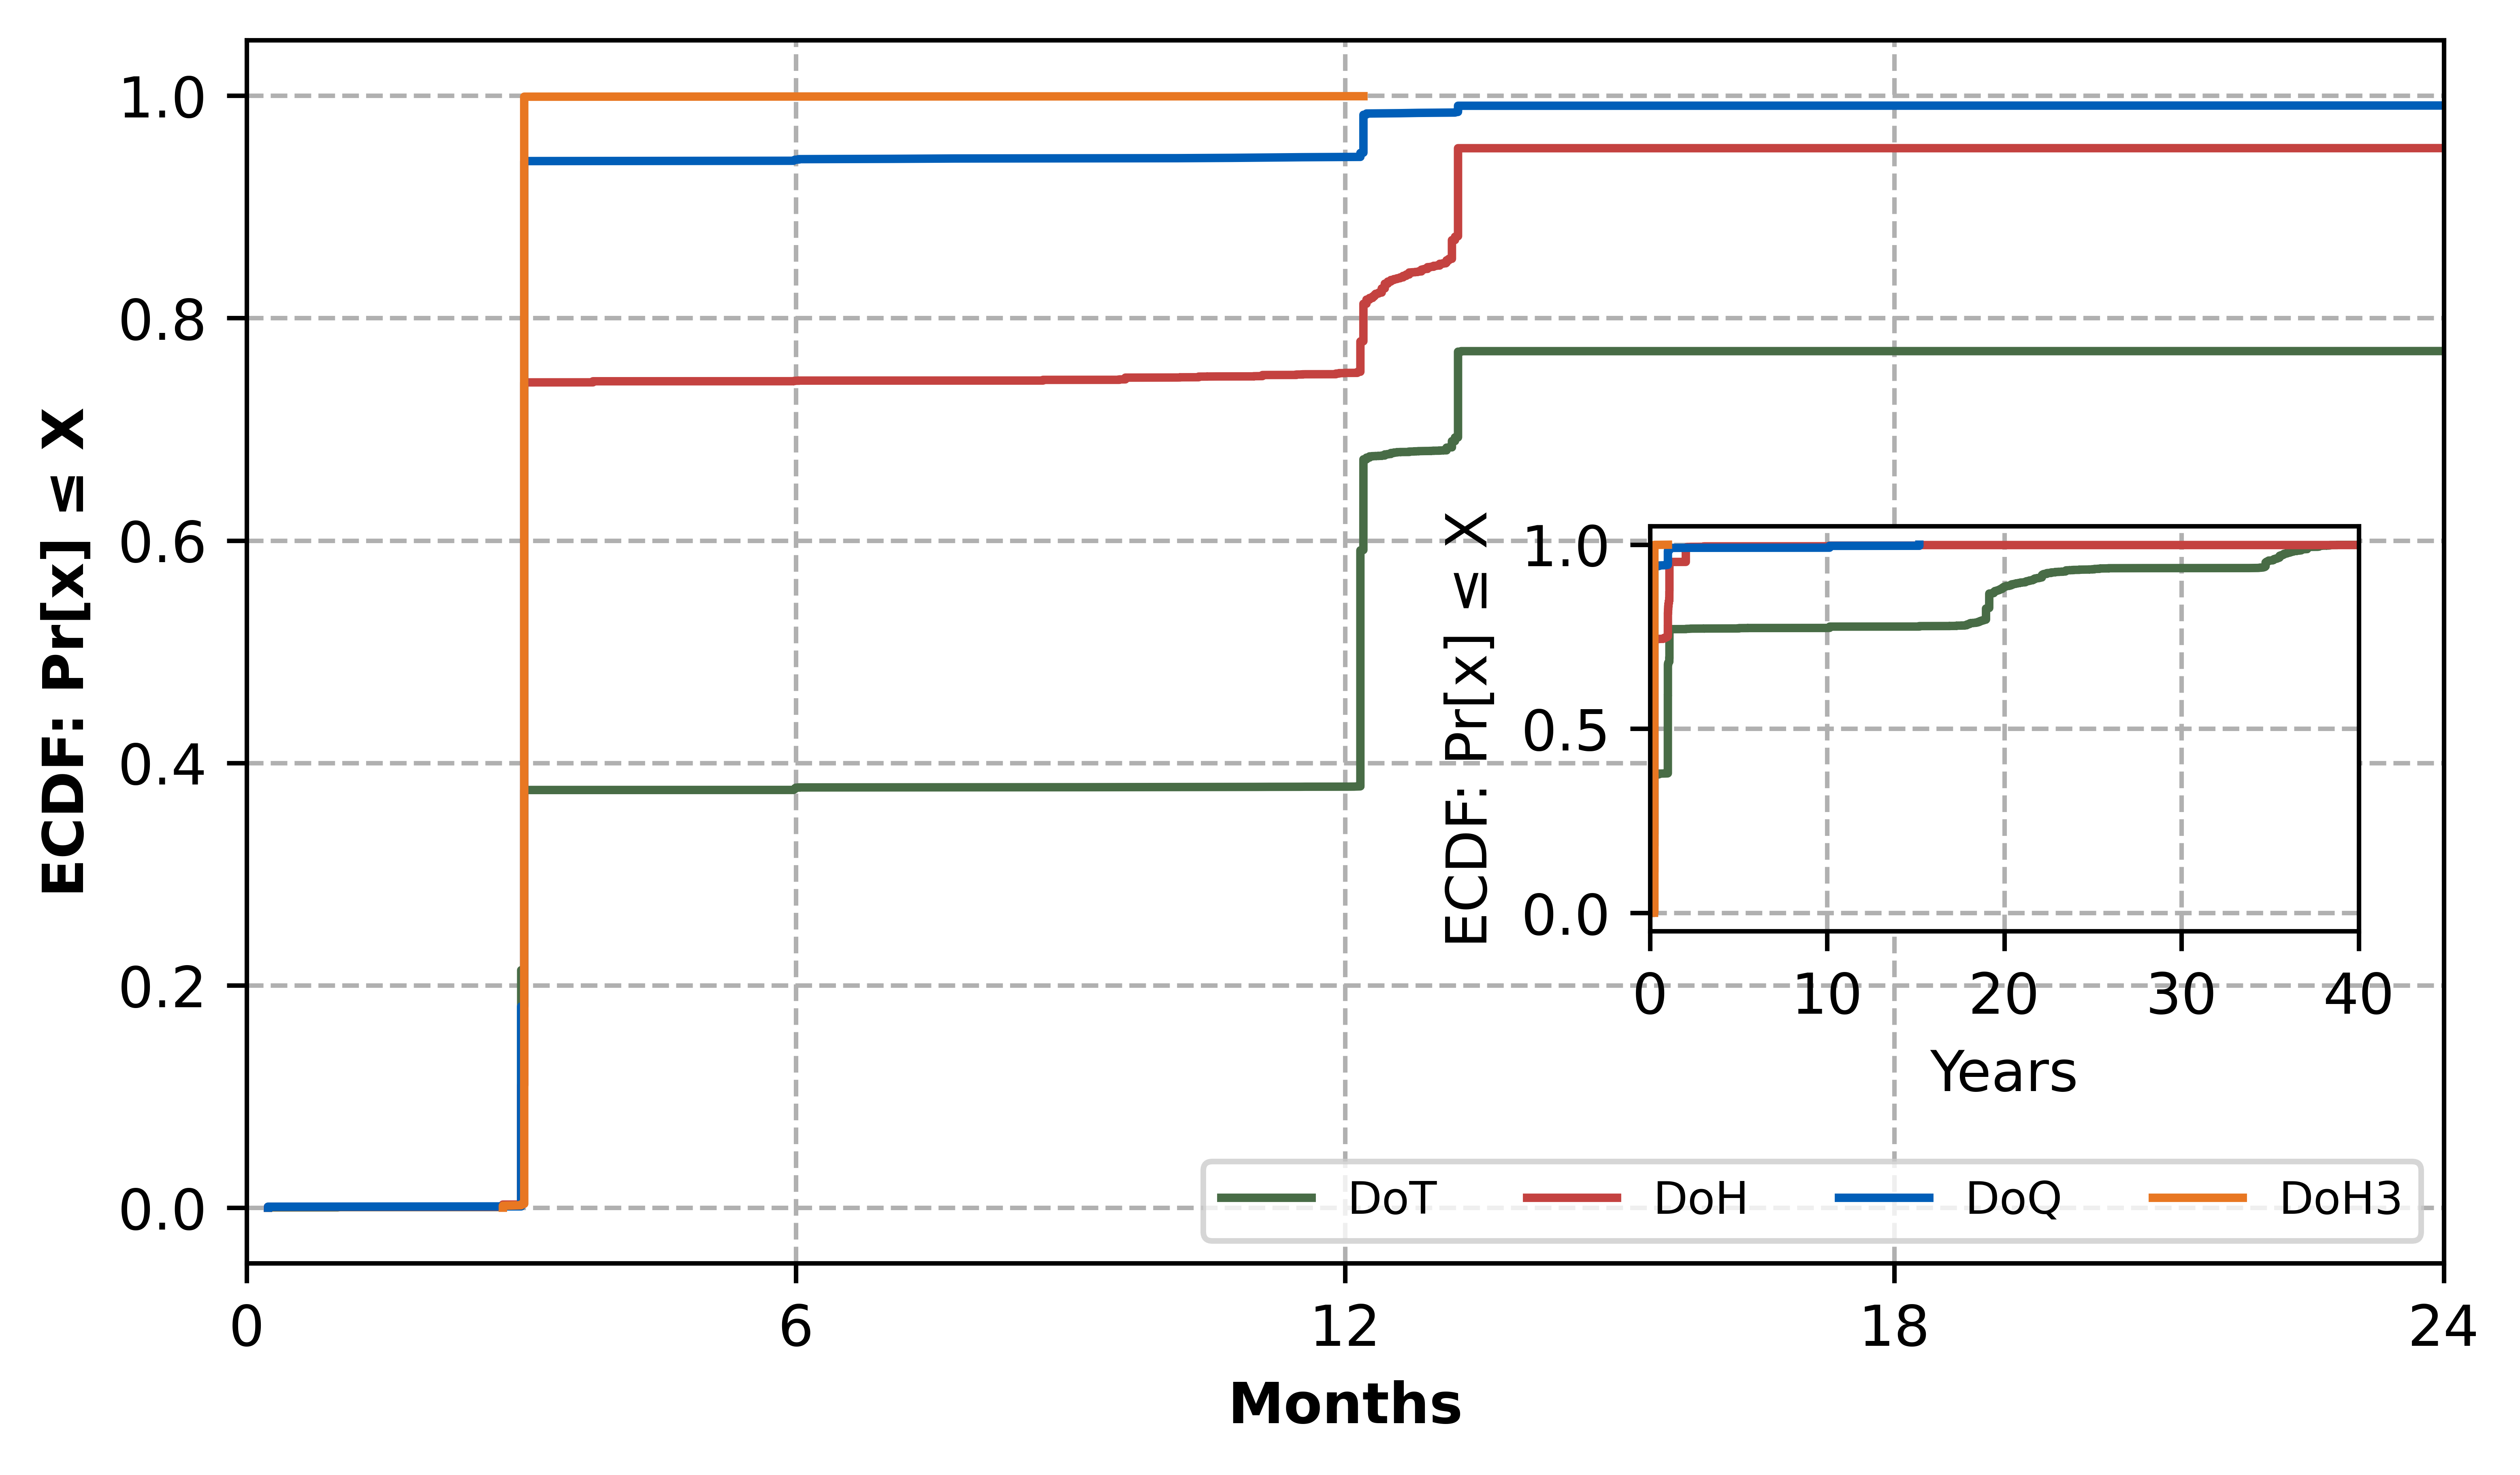

In [14]:
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="#e87722"
years = 30*12
months = 30

fig, ax = plt.subplots(figsize=(7,4),dpi=1000)

sample1 = dot_raw["cert_lifetime"].astype(float)/months
sample2 = doh_raw["cert_lifetime"].astype(float)/months
sample3 = doq_raw["cert_lifetime"].astype(float)/months
sample4 = doh3_raw["cert_lifetime"].astype(float)/months
                  
s1 = np.sort(sample1)
s2= np.sort(sample2)
s3= np.sort(sample3)
s4= np.sort(sample4)

colors = ["#af24b9", '#84584e', '#486c46', '#c44240', TUMBlue, TUMOrange] 

ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = colors[2],label="DoT")
ax.plot(s2,np.arange(len(s2))/float(len(s2)),color =colors[3],label="DoH")
ax.plot(s3,np.arange(len(s3))/float(len(s3)),color =colors[4],label="DoQ")
ax.plot(s4,np.arange(len(s4))/float(len(s4)),color =colors[5],label="DoH3")

#plt.xscale("log")
plt.xlabel('Months',weight='bold')
plt.ylabel('ECDF: Pr[x] ≤ X',weight='bold')
#x1, x2, y1, y2 = plt.axis()
#plt.axis((x1, 1000, y1, y2))a
axes = plt.gca()
axes.set_xlim([0, 24])
plt.xticks(np.arange(0, 24+1, 6))
# plt.yticks(fontproperties=font3)
# plt.legend(loc =6,bbox_to_anchor=(0.92, 0.7))
plt.legend(fontsize=8,loc =0,ncol=4)
plt.grid(linestyle = "--") #设置背景网格线为虚线


sample1 = dot_raw["cert_lifetime"].astype(float)/years
sample2 = doh_raw["cert_lifetime"].astype(float)/years
sample3 = doq_raw["cert_lifetime"].astype(float)/years
sample4 = doh3_raw["cert_lifetime"].astype(float)/years

s1 = np.sort(sample1)
s2= np.sort(sample2)
s3= np.sort(sample3)
s4= np.sort(sample4)

# sample3 = dot_cert_raw["cert_lifetime"].astype(float).astype(float)/years
# s3 = np.sort(sample3)
# sample4 = doh_cert_raw["cert_lifetime"].astype(float).astype(float)/years
# s4 = np.sort(sample4)


inset_ax = fig.add_axes([0.62, 0.33, 0.25, 0.25],facecolor="white")
inset_ax.set_xlim([0,15])
# inset_ax.set_ylim([0,0.4])

inset_ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = colors[2],label="DoT")
inset_ax.plot(s2,np.arange(len(s2))/float(len(s2)),color =colors[3],label="DoH")
inset_ax.plot(s3,np.arange(len(s3))/float(len(s3)),color =colors[4],label="DoQ")
inset_ax.plot(s4,np.arange(len(s4))/float(len(s4)),color =colors[5],label="DoH3")


# inset_ax.plot(s3,np.arange(len(s3))/float(len(s3)),color = TUMBlue,label="DOT-SP")
# inset_ax.plot(s4,np.arange(len(s4))/float(len(s4)),color = TUMOrange,label="DOH-SP",linestyle="dashed")
inset_ax.grid(linestyle = "--")
inset_ax.set_xlabel('Years')
inset_ax.set_ylabel('ECDF: Pr[x] ≤ X')
# inset_ax.grid(linestyle = "--") #设置背景网格线为虚线


# ax.set_xlim(0,24)
inset_ax.set_xlim(0,40)
plt.savefig("./fig/doe_cert_lifetime.png")

plt.show()

In [16]:
import datetime
import json
import base64
from OpenSSL import crypto

def get_before(data):
    if "raw_cert_chain" in data.keys():
        raw_cert_chain = data['raw_cert_chain']
    else:
        raw_cert_chain = data['cert_chain']
    if raw_cert_chain != "" and type(raw_cert_chain)==str:
        leaf_cert = raw_cert_chain.split("###")[0]
        pem = base64.b64decode(leaf_cert)
        cert_body = crypto.load_certificate(crypto.FILETYPE_PEM, pem)  # 从类型为type编码的字符串缓冲区加载证书 (X509)
        notBefore = datetime.datetime.strptime(cert_body.get_notBefore().decode(), "%Y%m%d%H%M%SZ")
        
        return notBefore
        

In [17]:
import datetime
import json
import base64
from OpenSSL import crypto

def get_after(data):
    if "raw_cert_chain" in data.keys():
        raw_cert_chain = data['raw_cert_chain']
    else:
        raw_cert_chain = data['cert_chain']
    if raw_cert_chain != "" and type(raw_cert_chain)==str:
        leaf_cert = raw_cert_chain.split("###")[0]
        pem = base64.b64decode(leaf_cert)
        cert_body = crypto.load_certificate(crypto.FILETYPE_PEM, pem)  # 从类型为type编码的字符串缓冲区加载证书 (X509)
        notAfter = datetime.datetime.strptime(cert_body.get_notAfter().decode(), "%Y%m%d%H%M%SZ")
        
        return notAfter
        

In [18]:
dot_raw = dot_raw.assign(notBefore=dot_raw.apply(lambda x: get_before(x), axis=1))
doh_raw = doh_raw.assign(notBefore=doh_raw.apply(lambda x: get_before(x), axis=1))
doq_raw = doq_raw.assign(notBefore=doq_raw.apply(lambda x: get_before(x), axis=1))
doh3_raw = doh3_raw.assign(notBefore=doh3_raw.apply(lambda x: get_before(x), axis=1))

# print(dot_raw['notBefore'].value_counts())
# print("---------------------------------")
# print(dot_raw['notBefore'].value_counts()/len(dot_raw)*100)

In [19]:
dot_raw = dot_raw.assign(notAfter=dot_raw.apply(lambda x: get_after(x), axis=1))
doh_raw = doh_raw.assign(notAfter=doh_raw.apply(lambda x: get_after(x), axis=1))
doq_raw = doq_raw.assign(notAfter=doq_raw.apply(lambda x: get_after(x), axis=1))
doh3_raw = doh3_raw.assign(notAfter=doh3_raw.apply(lambda x: get_after(x), axis=1))

# print(dot_raw['notBefore'].value_counts())
# print("---------------------------------")
# print(dot_raw['notBefore'].value_counts()/len(dot_raw)*100)

In [20]:
dot_notAfter = list(doq_raw['notAfter'])
dot_notBefore = list(doq_raw['notBefore'])

([<matplotlib.axis.XTick at 0x2ba4a2850>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

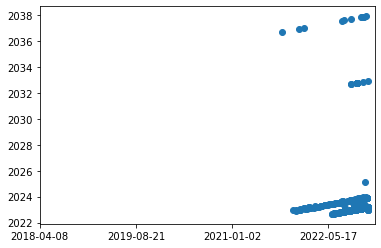

In [21]:
import matplotlib.dates as mdate
plt.scatter(dot_notBefore,dot_notAfter)
plt.xlim(pd.Timestamp('2018-04-08'),pd.Timestamp('2023-01-12'))
plt.xticks(pd.date_range('20180408','20230112',freq='500d'))
# print(pd.Timestamp('2019-03-04'))
# pd.date_range('20190408','20221212',freq='100d')

2014-05-09T06:54:10.000000000


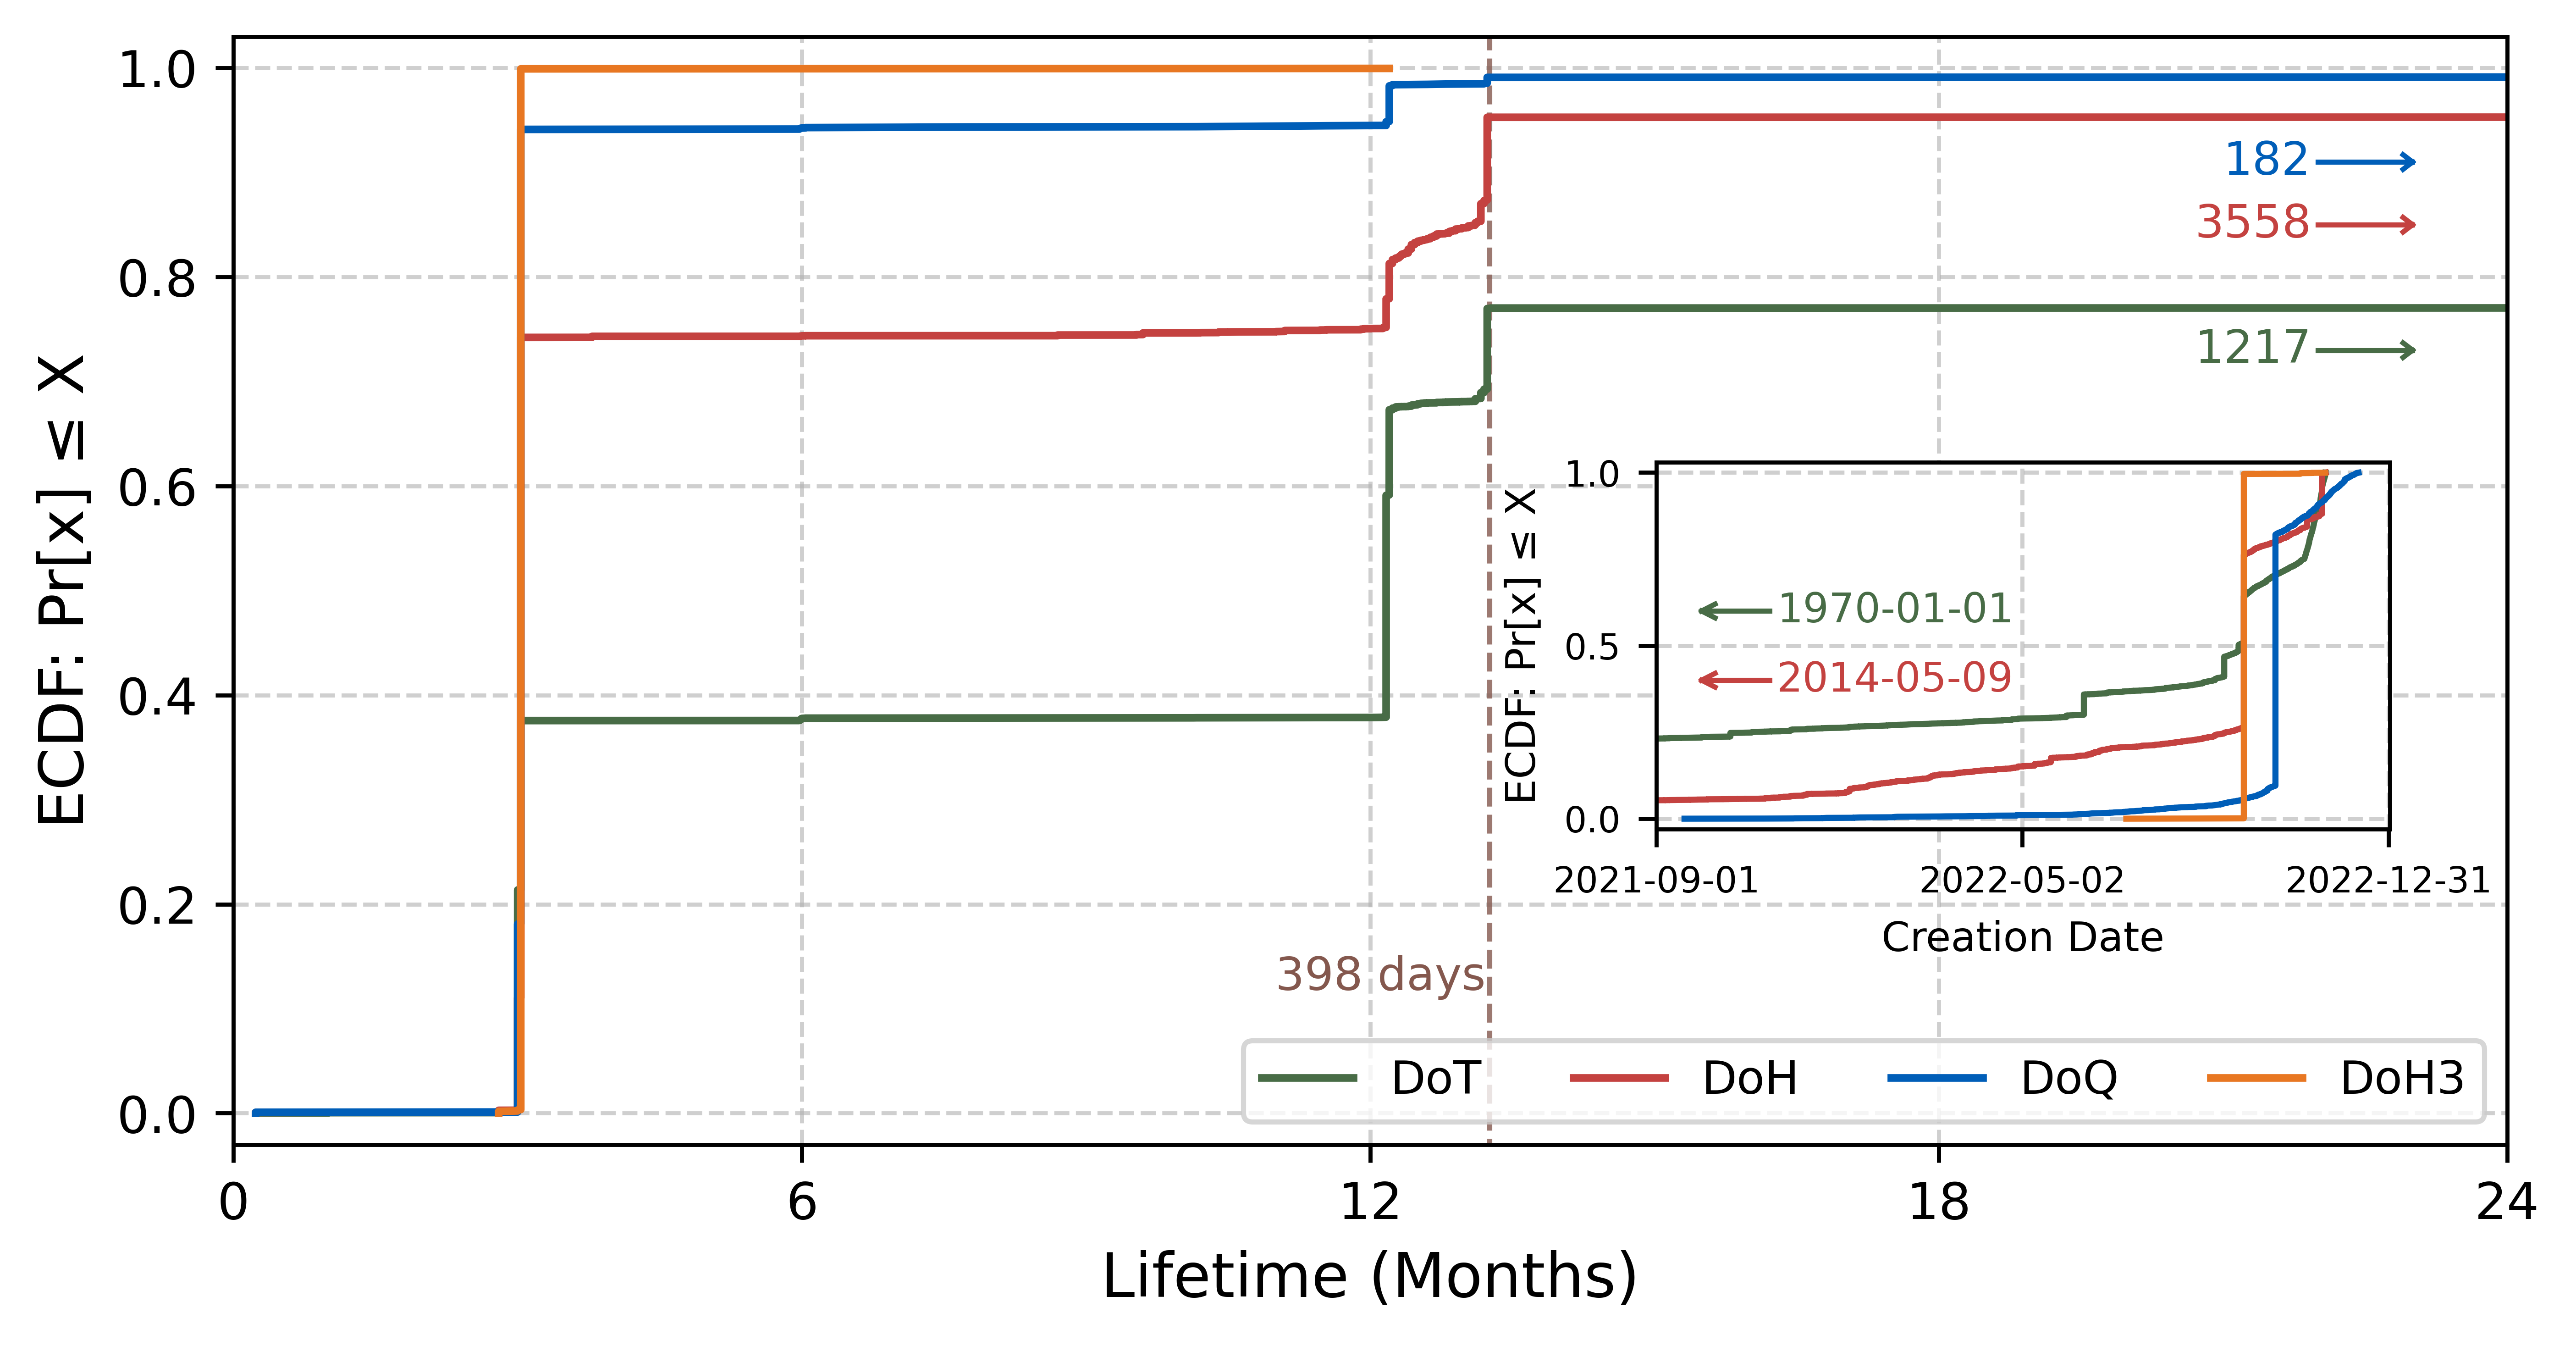

In [25]:
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="#e87722"
years = 30*12
months = 30

fig, ax = plt.subplots(figsize=(8,4),dpi=800)

sample1 = dot_raw["cert_lifetime"].astype(float)/months
sample2 = doh_raw["cert_lifetime"].astype(float)/months
sample3 = doq_raw["cert_lifetime"].astype(float)/months
sample4 = doh3_raw["cert_lifetime"].astype(float)/months
                  
s1 = np.sort(sample1)
s2= np.sort(sample2)
s3= np.sort(sample3)
s4= np.sort(sample4)

colors = ["#af24b9", '#84584e', '#486c46', '#c44240', TUMBlue, TUMOrange] 

# 398天
plt.plot([13.26,13.26], [-1,2],color=colors[1],linestyle="--",alpha=0.8,linewidth=1)

# 生命周期CDF
ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = colors[2],label="DoT")
ax.plot(s2,np.arange(len(s2))/float(len(s2)),color =colors[3],label="DoH")
ax.plot(s3,np.arange(len(s3))/float(len(s3)),color =colors[4],label="DoQ")
ax.plot(s4,np.arange(len(s4))/float(len(s4)),color =colors[5],label="DoH3")

# 生命周期剪头
# DoT
ax.plot([22,23],[0.73,0.73],color=colors[2],linewidth=1)
ax.plot([22.9,23],[0.737,0.73],color=colors[2],linewidth=1)
ax.plot([22.9,23],[0.723,0.73],color=colors[2],linewidth=1)
ax.text(20.7,0.73,"1217",fontsize=9,va='center',color = colors[2])

# DoQ
ax.plot([22,23],[0.91,0.91],color=colors[4],linewidth=1)
ax.plot([22.9,23],[0.917,0.91],color=colors[4],linewidth=1)
ax.plot([22.9,23],[0.903,0.91],color=colors[4],linewidth=1)
ax.text(21,0.91,"182",fontsize=9,va='center',color = colors[4])

#DoH
ax.plot([22,23],[0.85,0.85],color=colors[3],linewidth=1)
ax.plot([22.9,23],[0.857,0.85],color=colors[3],linewidth=1)
ax.plot([22.9,23],[0.843,0.85],color=colors[3],linewidth=1)
ax.text(20.7,0.85,"3558",fontsize=9,va='center',color = colors[3])

ax.text(11,0.13,"398 days",fontsize=9,va='center',color = colors[1])


#plt.xscale("log")
plt.xlabel('Lifetime (Months)',fontsize=12)
# ,weight='bold'
plt.ylabel('ECDF: Pr[x] ≤ X',fontsize=12)
#x1, x2, y1, y2 = plt.axis()
#plt.axis((x1, 1000, y1, y2))a
axes = plt.gca()
axes.set_xlim([0, 24])
plt.xticks(np.arange(0, 24+1, 6))
plt.ylim(-0.03,1.03)
plt.yticks(np.arange(0,1.1,0.2))
# plt.yticks(fontproperties=font3)
# plt.legend(loc =6,bbox_to_anchor=(0.92, 0.7))
plt.legend(fontsize=9,loc =0,ncol=4)
plt.grid(linestyle = "--",alpha=0.6) #设置背景网格线为虚线

# 证书创建时间CDF
# inset_ax = fig.add_axes([0.595, 0.345, 0.25, 0.25],facecolor="white")
inset_ax = fig.add_axes([0.61, 0.34, 0.25, 0.25],facecolor="white")

inset_ax.set_xlim([0,15])

sample1 = dot_raw["notBefore"]
sample2 = doh_raw["notBefore"]
sample3 = doq_raw["notBefore"]
sample4 = doh3_raw["notBefore"]
                  
s1 = np.sort(sample1)
s2= np.sort(sample2)
s3= np.sort(sample3)
s4= np.sort(sample4)

print(s2[0])
inset_ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = colors[2],label="DoT",linewidth=1.2)
inset_ax.plot(s2,np.arange(len(s2))/float(len(s2)),color =colors[3],label="DoH",linewidth=1.2)
inset_ax.plot(s3,np.arange(len(s3))/float(len(s3)),color =colors[4],label="DoQ",linewidth=1.2)
inset_ax.plot(s4,np.arange(len(s4))/float(len(s4)),color =colors[5],label="DoH3",linewidth=1.2)
inset_ax.set_xlim(pd.Timestamp('2021-09'),pd.Timestamp('2023-01'))
inset_ax.tick_params(labelsize=7)
inset_ax.set_xticks(pd.date_range('20210901','20230101',freq='243d'),rotation=20)
inset_ax.set_ylim(-0.03,1.03)
inset_ax.set_yticks(np.arange(0,1.1,0.5))

# 创建时间剪头
# DoT
inset_ax.plot([pd.Timestamp('2021-10'),pd.Timestamp('2021-11-15')],[0.6,0.6],color=colors[2],linewidth=1)
inset_ax.plot([pd.Timestamp('2021-10'),pd.Timestamp('2021-10-10')],[0.6,0.62],color=colors[2],linewidth=1)
inset_ax.plot([pd.Timestamp('2021-10'),pd.Timestamp('2021-10-10')],[0.6,0.58],color=colors[2],linewidth=1)
inset_ax.text(pd.Timestamp('2021-11-20'),0.6,"1970-01-01",fontsize=8,va='center',color = colors[2])

# DoH
inset_ax.plot([pd.Timestamp('2021-10'),pd.Timestamp('2021-11-15')],[0.4,0.4],color=colors[3],linewidth=1)
inset_ax.plot([pd.Timestamp('2021-10'),pd.Timestamp('2021-10-10')],[0.4,0.42],color=colors[3],linewidth=1)
inset_ax.plot([pd.Timestamp('2021-10'),pd.Timestamp('2021-10-10')],[0.4,0.38],color=colors[3],linewidth=1)
inset_ax.text(pd.Timestamp('2021-11-20'),0.4,"2014-05-09",fontsize=8,va='center',color = colors[3])



inset_ax.grid(linestyle = "--",alpha=0.6)
inset_ax.set_xlabel('Creation Date', fontsize=8)
inset_ax.set_ylabel('ECDF: Pr[x] ≤ X', fontsize=8)
# inset_ax.grid(linestyle = "--") #设置背景网格线为虚线


plt.savefig("./fig/dox_cert_lifetime.pdf")

plt.show()

In [36]:
temp = dot_raw[dot_raw['cert_lifetime']>=36500]
# len(temp)
temp
# len(temp[temp['notBefore']>='2020-09-01'])

,ip,port,tls_ver,success_flag,cert_chain,cert_valid,cert_time_valid,cert_lifetime,cert_level,caName,cert_error,notBefore,notAfter
3234,5.161.148.131,853,tls1_3,True,LS0tLS1CRUdJTiBDRVJUSUZJQ0FURS0tLS0tCk1JSURpRE...,False,True,36524.844525,UnknownValidationLevel,"Regery, https://regery.com",x509: certificate signed by unknown authority,2022-10-20 00:00:00,2122-10-20 20:16:07
17056,23.234.235.93,853,tls1_3,True,LS0tLS1CRUdJTiBDRVJUSUZJQ0FURS0tLS0tCk1JSUYrek...,False,True,36500.000000,UnknownValidationLevel,dns.onlybestoffers.trade,x509: certificate signed by unknown authority,2020-07-01 17:41:30,2120-06-07 17:41:30


In [242]:
temp = dot_raw[dot_raw['cert_lifetime']>=825]
len(temp[temp['notBefore']>='2020-09-01'])

883

In [252]:
temp = doh_raw[doh_raw['cert_lifetime']>=398]
len(temp[temp['notBefore']>='2020-09-01'])
temp = temp[temp['notBefore']>='2020-09-01']
temp['cert_error'].value_counts()

x509: certificate signed by unknown authority    799
Name: cert_error, dtype: int64

In [253]:
temp = dot_raw[dot_raw['cert_lifetime']>=398]
len(temp[temp['notBefore']>='2020-09-01'])
temp = temp[temp['notBefore']>='2020-09-01']
temp['caName'].value_counts()
temp['cert_error'].value_counts()
# temp

x509: certificate signed by unknown authority                                                                              896
x509: certificate has expired or is not yet valid: current time 2022-11-19T14:23:58+08:00 is after 2021-12-01T22:41:27Z      1
x509: certificate has expired or is not yet valid: current time 2022-11-19T14:23:58+08:00 is after 2021-12-01T22:55:18Z      1
x509: certificate has expired or is not yet valid: current time 2022-11-19T14:23:58+08:00 is after 2022-03-08T10:21:32Z      1
x509: certificate has expired or is not yet valid: current time 2022-11-19T14:23:58+08:00 is after 2022-03-08T09:24:37Z      1
Name: cert_error, dtype: int64

In [26]:
doq_raw['notBefore'].value_counts()

2022-10-17 00:00:00    2493
2022-12-02 00:00:00      18
2022-10-30 03:08:07      12
2022-11-22 00:00:00      10
2022-10-25 00:00:00       9
                       ... 
2022-10-23 16:52:29       1
2022-11-14 02:29:00       1
2022-10-04 10:39:18       1
2022-11-29 02:48:13       1
2022-06-16 00:00:00       1
Name: notBefore, Length: 761, dtype: int64

In [29]:
temp = doq_raw[doq_raw['notBefore']>='2022-09-26']
len(temp)/len(doq_raw)

0.9438300349243306